In [8]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
spine = pd.read_csv('spine.csv')

In [12]:
scaler = StandardScaler()
scaler.fit(spine.drop('pain', axis=1))
scaledVariables = scaler.transform(spine.drop('pain',axis=1))
spineScaled = pd.DataFrame(scaledVariables, columns=spine.columns[:-1])

In [13]:
X = spineScaled
y = spine['pain']

# Create the Model

In [14]:
X_Train_embedded = TSNE(n_components=2).fit_transform(X)
print(X_Train_embedded.shape)
model = LogisticRegression().fit(X,y)
y_predicted = model.predict(X)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(310, 2)


# Create Meshgrid

In [15]:
resolution = 100
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# Approximate Voronoi tesselation on resolution x resolution grid using 4-NN

In [18]:
background_model = KNeighborsClassifier(n_neighbors=4).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

# Plot

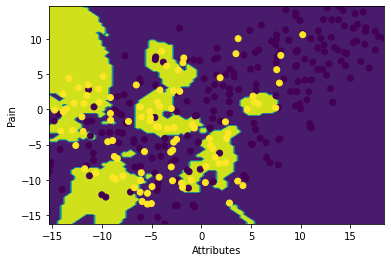

In [19]:
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
plt.xlabel('Attributes')
plt.ylabel('Pain')
plt.show()

# 11-NN

In [20]:
background_model = KNeighborsClassifier(n_neighbors=11).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

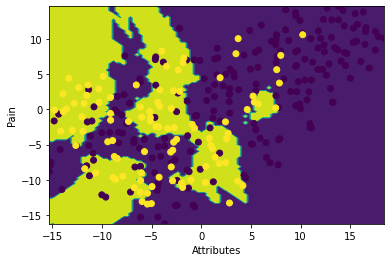

In [21]:
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
plt.xlabel('Attributes')
plt.ylabel('Pain')
plt.show()

# 24-NN

In [24]:
background_model = KNeighborsClassifier(n_neighbors=24).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

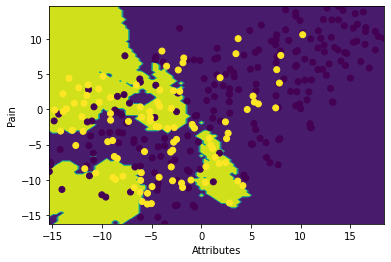

In [25]:
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
plt.xlabel('Attributes')
plt.ylabel('Pain')
plt.show()